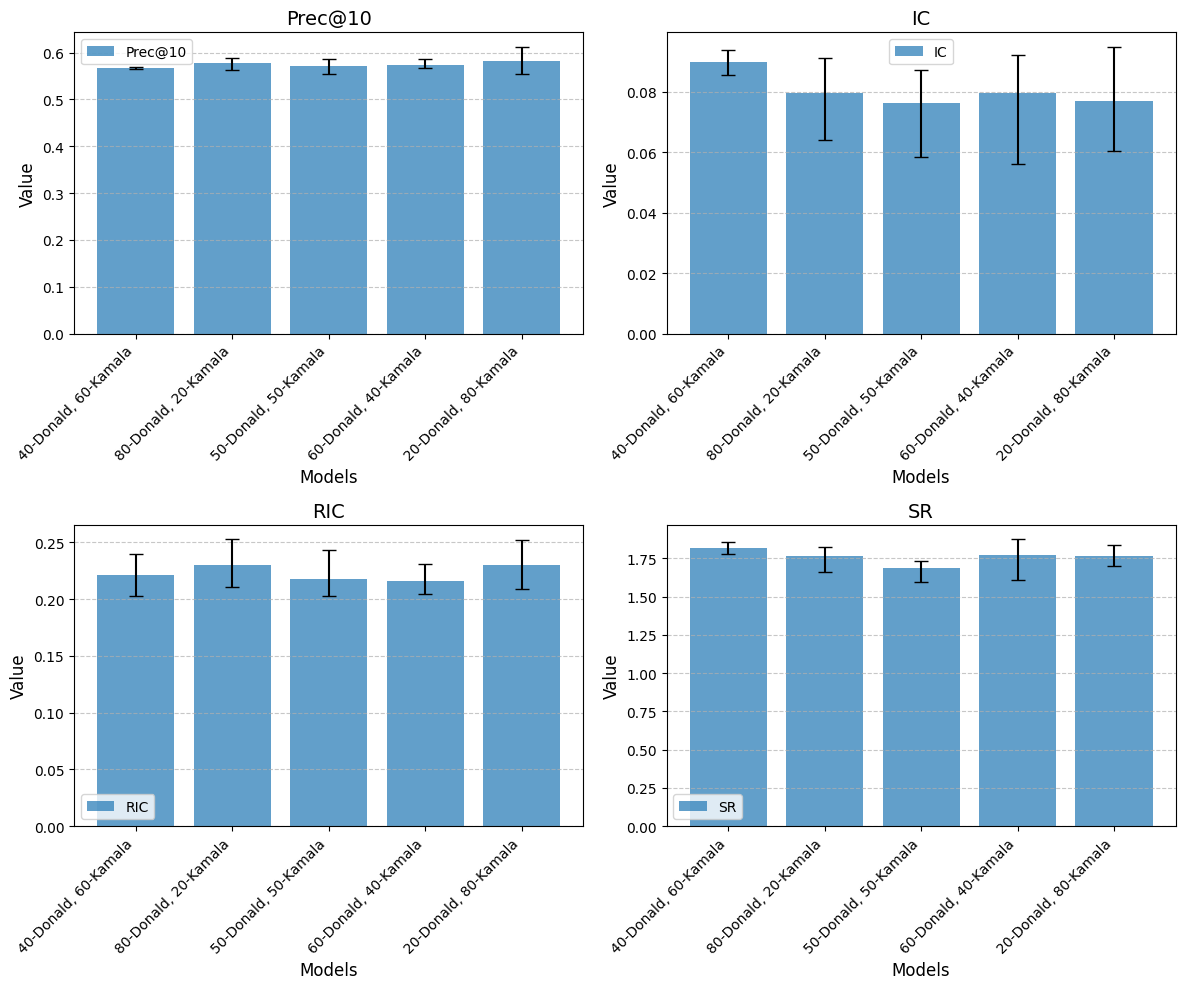

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Data for ensemble models
models = [
    "40-Donald, 60-Kamala",
    "80-Donald, 20-Kamala",
    "50-Donald, 50-Kamala",
    "60-Donald, 40-Kamala",
    "20-Donald, 80-Kamala"
]

metrics = {
    "Prec@10": [
        (0.56696, (0.56505, 0.56888)),
        (0.57832, (0.56352, 0.58852)),
        (0.57177, (0.55332, 0.58571)),
        (0.57381, (0.56735, 0.58597)),
        (0.5829, (0.5533, 0.6125))
    ],
    "IC": [
        (0.089838, (0.08549, 0.093827)),
        (0.0794, (0.064071, 0.091013)),
        (0.0762, (0.05833, 0.087)),
        (0.0797, (0.056153, 0.091961)),
        (0.077, (0.0605, 0.09486))
    ],
    "RIC": [
        (0.22093, (0.2024, 0.23945)),
        (0.230, (0.21035, 0.25277)),
        (0.2181, (0.20293, 0.24305)),
        (0.2163, (0.20409, 0.23075)),
        (0.230, (0.20931, 0.25201))
    ],
    "SR": [
        (1.81626, (1.7765, 1.8559)),
        (1.768, (1.65829, 1.82761)),
        (1.6843, (1.5944, 1.7361)),
        (1.7714, (1.6069, 1.8756)),
        (1.766, (1.69793, 1.83589))
    ]
}

# Calculate error bars
for metric, values in metrics.items():
    for i, (mean, (low, high)) in enumerate(values):
        error = (mean - low, high - mean)
        metrics[metric][i] = (mean, error)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot each metric
for i, (metric, values) in enumerate(metrics.items()):
    means = [val[0] for val in values]
    errors = np.array([val[1] for val in values]).T

    bar_positions = np.arange(len(models))
    axes[i].bar(bar_positions, means, yerr=errors, capsize=5, alpha=0.7, label=metric)
    axes[i].set_title(metric, fontsize=14)
    axes[i].set_ylabel("Value", fontsize=12)
    axes[i].set_xlabel("Models", fontsize=12)
    axes[i].set_xticks(bar_positions)
    axes[i].set_xticklabels(models, rotation=45, ha='right')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
